In [ ]:
!wget http://cb.lk/covid_19

--2020-08-07 20:25:08--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-08-07 20:25:09--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-08-07 20:25:10--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-08-07 20:25:10--  https://www.dropbox.com/s/raw/7

KeyboardInterrupt: ignored

In [8]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [9]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [11]:
#cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3) , activation = 'relu' , input_shape = (224,224,3)))
model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPooling2D( pool_size = (2,2) ))
model.add(Dropout( 0.25 ))

model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPooling2D( pool_size = (2,2) ))
model.add(Dropout( 0.25 ))

model.add(Conv2D(128, kernel_size = (3,3) , activation = 'relu' ))
model.add(MaxPooling2D( pool_size = (2,2) ))
model.add(Dropout( 0.25 ))


model.add(Flatten())
model.add(Dense(64, activation = 'relu' ))
model.add(Dropout( 0.25 ))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = keras.losses.binary_crossentropy , optimizer='adam', metrics=['accuracy'])


model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [12]:
#train 
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale= 1./255)


train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train', 
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val', 
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [13]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 55s 8s/step - loss: 1.0991 - accuracy: 0.5491 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 53s 8s/step - loss: 0.6862 - accuracy: 0.5938 - val_loss: 0.6435 - val_accuracy: 0.8500
Epoch 3/10
7/7 [==============================] - 53s 8s/step - loss: 0.5182 - accuracy: 0.7902 - val_loss: 0.3257 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 53s 8s/step - loss: 0.3199 - accuracy: 0.8661 - val_loss: 0.2305 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 53s 8s/step - loss: 0.2909 - accuracy: 0.8750 - val_loss: 0.1955 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 53s 8s/step - loss: 0.2483 - accuracy: 0.9107 - val_loss: 0.1425 - val_accuracy: 0.9167
Epoch 7/10
7/7 [==============================] - 53s 8s/step - loss: 0.2069 - accuracy: 0.9152 

# Loss

In [14]:
model.save("model_adv.h5")

In [15]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.11961957067251205, 0.9642857313156128]

In [16]:
model.evaluate_generator(validation_generator)

[0.08385119587182999, 0.9666666388511658]

# Test

In [17]:
model= load_model('model_adv.h5')

In [18]:
import os

In [19]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [20]:
y_actual= []
y_test= []

In [21]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img= image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p= model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img= image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p= model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)


In [23]:
y_actual= np.array(y_actual)
y_test = np.array(y_test)


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm= confusion_matrix(y_actual, y_test)


In [26]:
cm

array([[30,  0],
       [ 2, 28]])

In [27]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


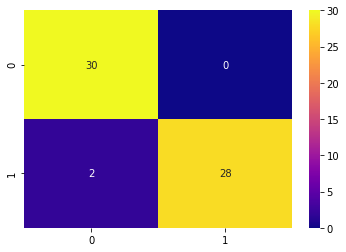

In [28]:
sns.heatmap(cm, cmap="plasma", annot= True)